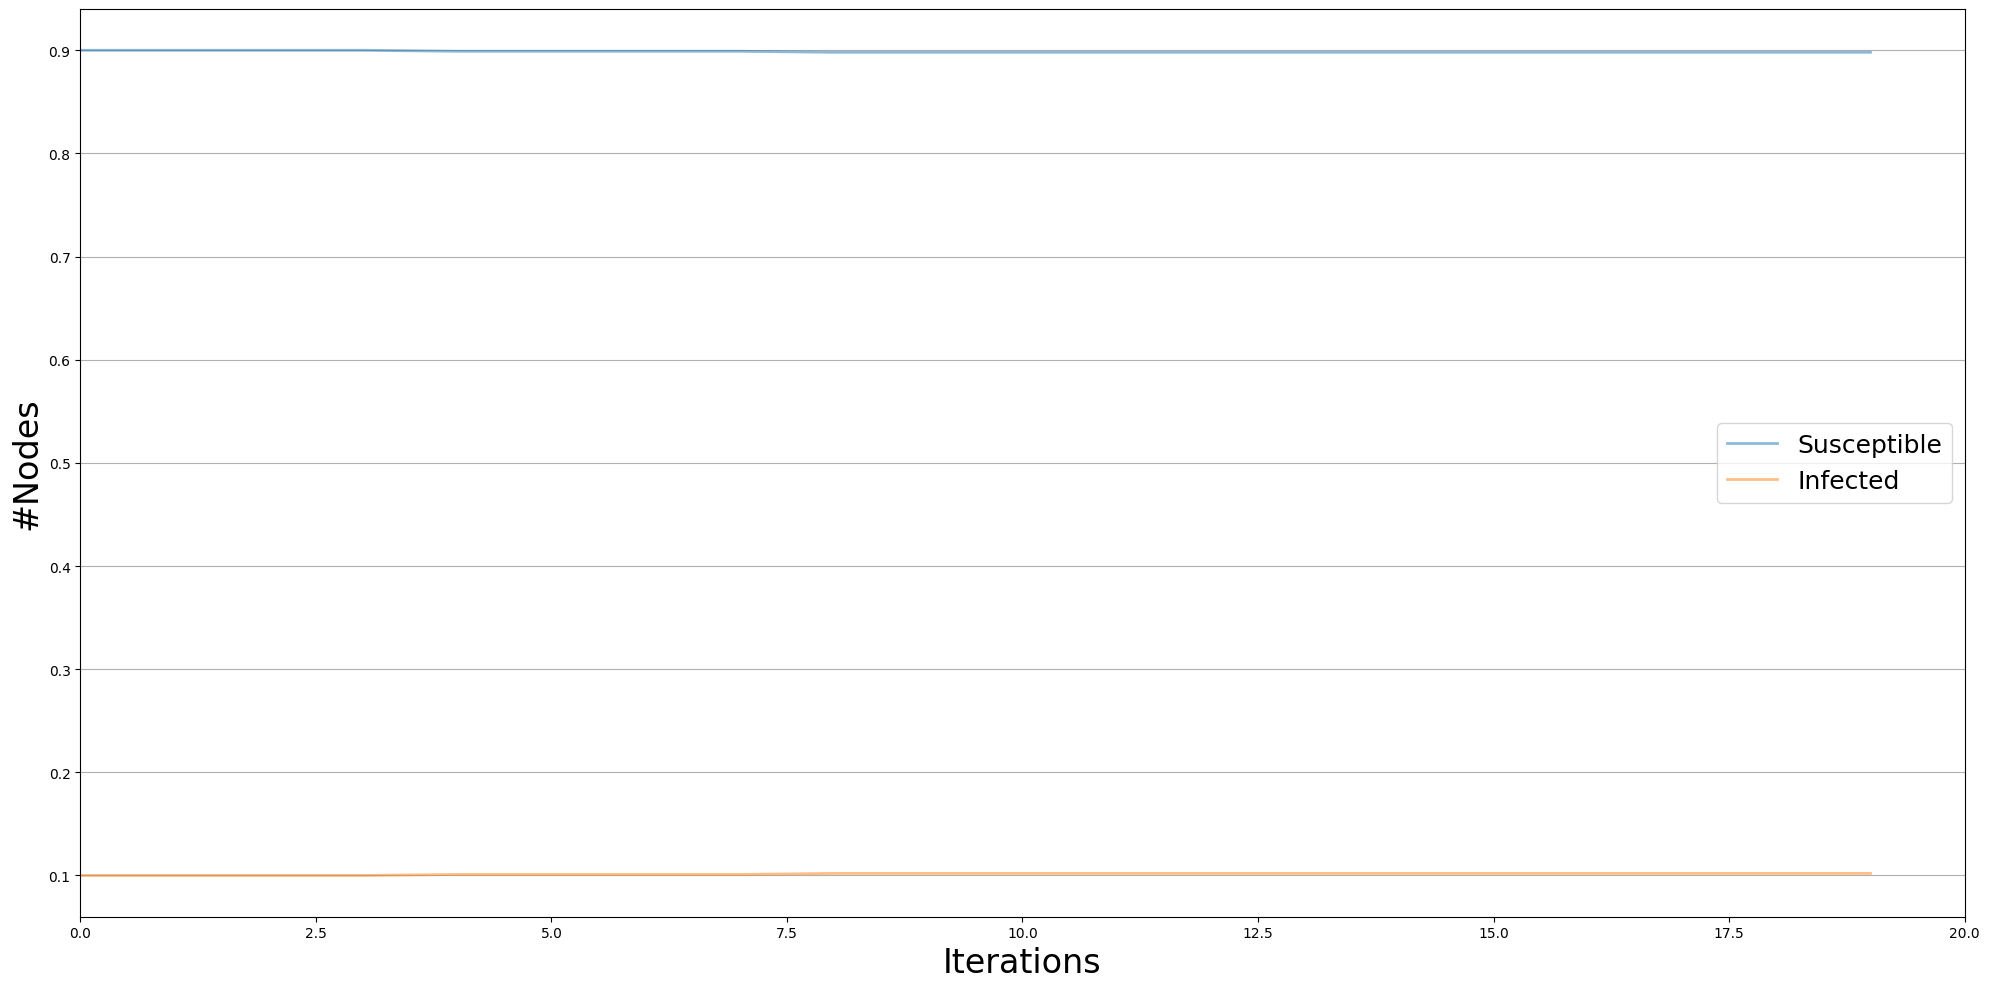

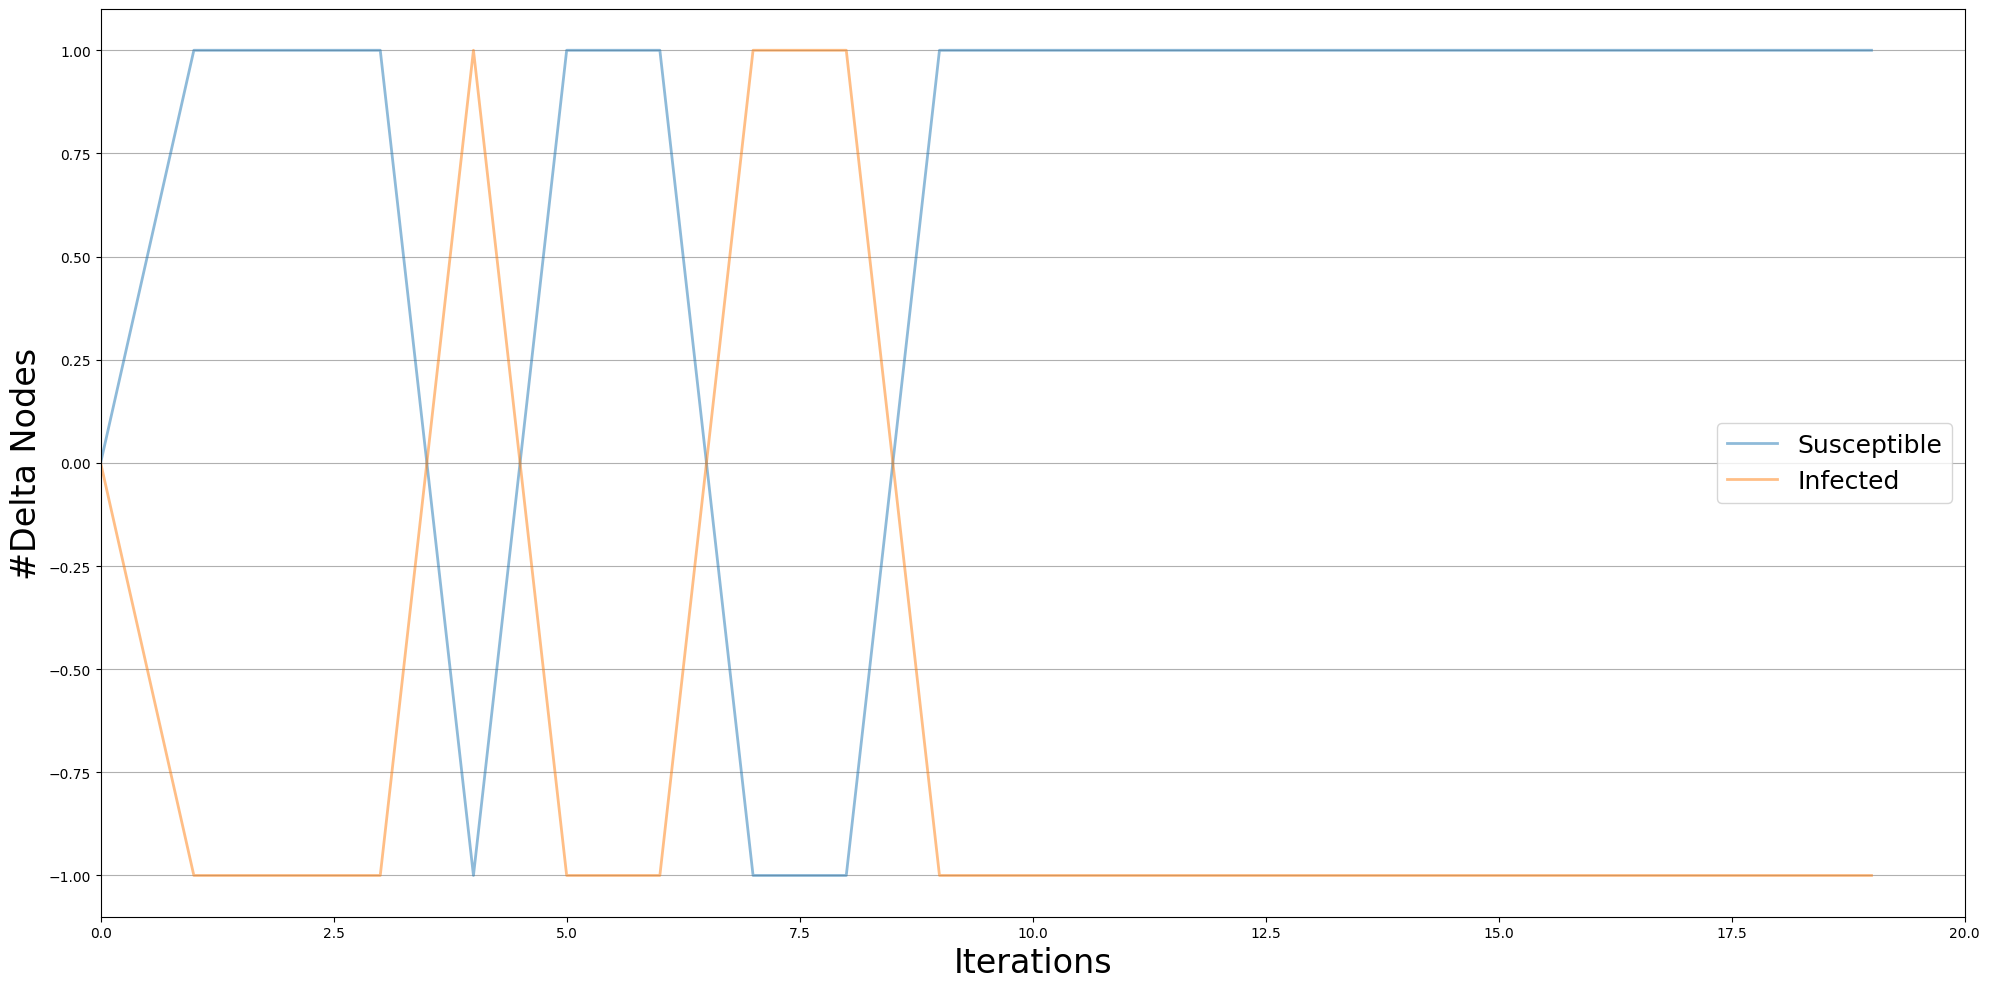

In [8]:
'''
The Voter model is one of the simplest models of opinion dynamics, originally introduced to analyse competition of species [1] and soon after applied to model elections [2].

The model assumes the opinion of an individual to be a discrete variable ±1.

The state of the population varies based on a very simple update rule: at each iteration, a random individual is selected, who then copies the opinion of one random neighbour.

Starting from any initial configuration, on a complete network the entire population converges to consensus on one of the two options. The probability that consensus 
is reached on opinion +1 is equal to the initial fraction of individuals holding that opinion [3].

Statuses:
- 0: Susceptible
- 1: Infected

Initial Parameters:
- fraction_infected: Fraction of infected individuals at the beginning of the simulation
- percentage_broken_links: Percentage of broken links in the network


'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import matplotlib.pyplot as plt


# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = op.VoterModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()
